<a href="https://colab.research.google.com/github/CarlAbdelnour/Pytorch-Tutorial-Youtube/blob/main/Intro_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [15]:
class Model(nn.Module):
  def __init__(self, in_features=4,h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self,x):
      x=F.relu(self.fc1(x))
      x=F.relu(self.fc2(x))
      x= self.out(x)
      return x


In [16]:
torch.manual_seed(41)
model=Model()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
url="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
my_df = pd.read_csv(url)
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
my_df["species"]=my_df["species"].replace('setosa',0.0)
my_df["species"]=my_df["species"].replace('versicolor',1.0)
my_df["species"]=my_df["species"].replace('virginica',2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [27]:
X=my_df.drop('species',axis=1)
y=my_df.species

In [28]:
X=X.values
y=y.values

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [32]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_train)

In [33]:
y_train = torch.LongTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=0.01)

In [35]:
epochs =100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss=criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())

  if i % 10 ==0:
    print(f'Epoch : {i} and loss : {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch : 0 and loss : 1.1251550912857056
Epoch : 10 and loss : 1.0096259117126465
Epoch : 20 and loss : 0.8157405853271484
Epoch : 30 and loss : 0.585706353187561
Epoch : 40 and loss : 0.3999636471271515
Epoch : 50 and loss : 0.2676880657672882
Epoch : 60 and loss : 0.17942363023757935
Epoch : 70 and loss : 0.12151690572500229
Epoch : 80 and loss : 0.0860118418931961
Epoch : 90 and loss : 0.06520850956439972


Text(0.5, 0, 'Epoch')

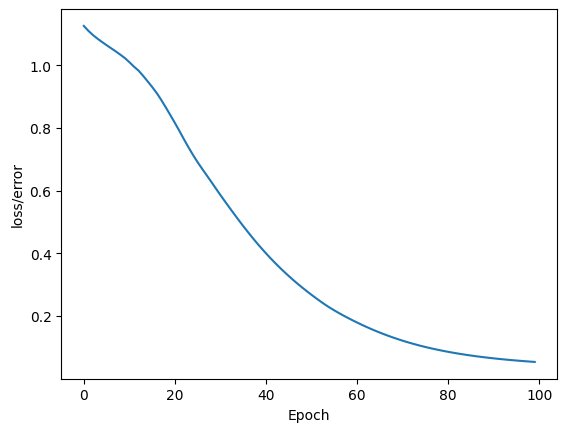

In [36]:
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [38]:
with torch.no_grad():
  y_eval=model.forward(X_test)
  loss = criterion(y_eval, y_test)

ValueError: Expected input batch_size (120) to match target batch_size (30).

In [39]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val= model.forward(data)
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')


1.) tensor([-1.9616,  3.9554,  0.5147])
2.) tensor([-4.7026,  5.8699,  2.8960])
3.) tensor([-5.3966,  3.7096,  6.5356])
4.) tensor([-4.0003,  5.0423,  2.6355])
5.) tensor([-7.1820,  4.8864,  8.2689])
6.) tensor([ 5.6560, -3.1966, -3.4161])
7.) tensor([-6.9262,  5.2925,  7.3658])
8.) tensor([-4.2085,  6.1263,  1.7636])
9.) tensor([-6.9353,  5.1641,  7.5450])
10.) tensor([-5.3668,  4.9540,  5.0888])
11.) tensor([-3.8193,  5.7499,  1.5058])
12.) tensor([-4.1787,  5.2171,  2.7471])
13.) tensor([ 5.2640, -2.8635, -3.2270])
14.) tensor([-7.8811,  4.1207, 10.3660])
15.) tensor([-7.6876,  4.1806,  9.9631])
16.) tensor([ 4.6381, -2.2832, -2.9393])
17.) tensor([-7.4193,  4.3834,  9.2738])
18.) tensor([-1.5679,  3.5508,  0.2956])
19.) tensor([ 4.0451, -1.7811, -2.6465])
20.) tensor([-5.1062,  5.2162,  4.3150])
21.) tensor([-6.7377,  4.5934,  7.8507])
22.) tensor([-3.1247,  5.0660,  1.1311])
23.) tensor([-7.7675,  5.0053,  9.1752])
24.) tensor([ 4.6892, -2.3555, -2.9499])
25.) tensor([ 5.4399, -3.

In [40]:
new_iris= torch.tensor([4.7,3.2,1.3,0.2])

In [41]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5365, -2.2383, -2.8684])


In [43]:
torch.save(model.state_dict(),'my_iris_model.pt')

In [44]:
new_model= Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [45]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)